In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_terpi_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Terpinolene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42965,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74996,42965,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74997,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74998,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Terpinolene', 'index'], axis = 1)
y = df_knn[['X..Terpinolene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

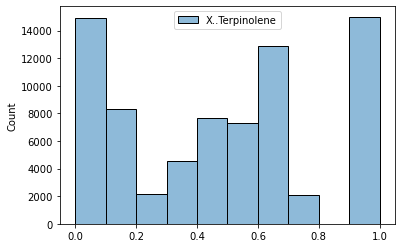

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.04264714360688046

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.014219723384513785

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.11924648164417173

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9302165130120486

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.8804833394829438

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([1.06724339e-01, 8.57828273e-02, 9.27077781e-02, 8.93204120e-02,
       8.11610479e-02, 2.48160335e-02, 7.98118425e-02, 2.59139247e-02,
       1.97928882e-04, 2.20537966e-03, 2.96057522e-03, 3.54641958e-09,
       4.34357009e-03, 1.93896538e-04, 8.12474733e-03, 1.28499562e-02,
       4.68618454e-03, 7.63920074e-03, 1.41682643e-07, 7.25942959e-03,
       2.20697244e-10, 3.65918433e-10, 6.43159794e-03, 1.03786412e-02,
       1.09079050e-02, 1.89119960e-03, 4.80624081e-03, 2.19723547e-04,
       1.72790327e-08, 1.99372227e-03, 1.41172120e-02, 9.93503845e-12,
       7.10742772e-03, 1.59114378e-06, 0.00000000e+00, 5.48746946e-03,
       4.12321463e-03, 7.68236135e-03, 4.15340513e-04, 1.40782756e-04,
       7.09610905e-04, 1.82667508e-02, 1.45544700e-04, 7.94838091e-03,
       2.14084678e-04, 1.11210229e-01, 7.69114702e-04, 2.28554846e-03,
       3.74783851e-03, 1.04797348e-03, 1.97174809e-02, 7.24488621e-03,
       1.73877307e-03, 7.23722789e-04, 2.06110188e-03, 2.25467870e-04,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,dry eyes,relaxed,berry,cheese,diesel,lemon,orange,vanilla
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,1,0,0,0,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,1,0,0,0,0,0,0
2,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,1,0,0,0,0,0,0
3,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,1,0,0,0,0,0,0
4,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,0,0,0,0,0,0,0
74996,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,0,0,0,0,0,0,0
74997,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,0,0,0,0,0,0,0
74998,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,1,0,0,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'dry eyes',
 'relaxed',
 'berry',
 'cheese',
 'diesel',
 'lemon',
 'orange',
 'vanilla']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_terpi.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_terpi.pkl")

['selector_knn_lsa_elbow_terpi.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.04724500201893623

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.016046392471339422

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.12667435601312296

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9223272321013984

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8646138168427149

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.031041914221332925

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.11113459047285212

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9889410658847918

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.895793348355139

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_terpi.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_terpi.pkl")

['y_test_knreg_lsa_elbow_terpi.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.030749706905703944

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.01229759990954819

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.11089454409279201

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.8972256162245442

In [65]:
y_test

,X..Terpinolene
11591,1.000000
52020,0.536842
34666,0.659649
22169,0.242105
23049,0.631579
...,...
60863,0.452632
32316,0.659649
60933,0.452632
43206,0.192982


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

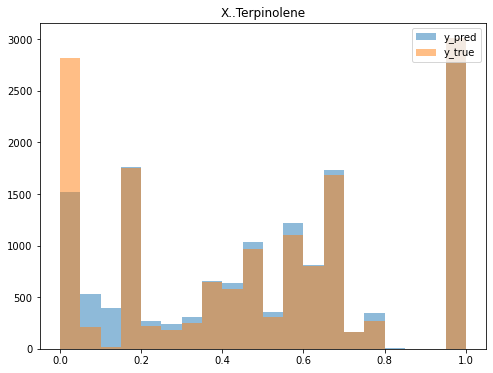

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Terpinolene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_terpi.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.950
P-value: 0.000


<AxesSubplot:>

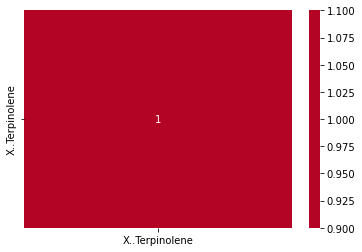

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)